### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key=""

In [3]:
import yfinance as yf

# Fetch data for AAPL
df = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
print(df)


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2020-01-02   72.796021   75.087502   75.150002   73.797501   74.059998   
2020-01-03   72.088303   74.357498   75.144997   74.125000   74.287498   
2020-01-06   72.662720   74.949997   74.989998   73.187500   73.447502   
2020-01-07   72.320984   74.597504   75.224998   74.370003   74.959999   
2020-01-08   73.484337   75.797501   76.110001   74.290001   74.290001   
...                ...         ...         ...         ...         ...   
2022-12-23  130.487823  131.860001  132.419998  129.639999  130.919998   
2022-12-27  128.676834  130.029999  131.410004  128.720001  131.380005   
2022-12-28  124.728378  126.040001  131.029999  125.870003  129.669998   
2022-12-29  128.261215  129.610001  130.479996  127.730003  127.989998   
2022-12-30  128.577881  129.929993  12

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,72.7960205078125,75.0875015258789,75.1500015258789,73.79750061035156,74.05999755859375,135480400
3,2020-01-03,72.08830261230469,74.35749816894531,75.1449966430664,74.125,74.2874984741211,146322800
4,2020-01-06,72.6627197265625,74.94999694824219,74.98999786376953,73.1875,73.44750213623047,118387200


In [8]:
df.tail()

,Price,Adj Close,Close,High,Low,Open,Volume
753,2022-12-23,130.48782348632812,131.86000061035156,132.4199981689453,129.63999938964844,130.9199981689453,63814900
754,2022-12-27,128.6768341064453,130.02999877929688,131.41000366210938,128.72000122070312,131.3800048828125,69007800
755,2022-12-28,124.72837829589844,126.04000091552734,131.02999877929688,125.87000274658203,129.6699981689453,85438400
756,2022-12-29,128.26121520996094,129.61000061035156,130.47999572753906,127.7300033569336,127.98999786376953,75703700
757,2022-12-30,128.577880859375,129.92999267578125,129.9499969482422,127.43000030517578,128.41000366210938,77034200


In [9]:
df1=df.reset_index()['Close']

In [10]:
df1

0                    AAPL
1                     NaN
2        75.0875015258789
3       74.35749816894531
4       74.94999694824219
              ...        
753    131.86000061035156
754    130.02999877929688
755    126.04000091552734
756    129.61000061035156
757    129.92999267578125
Name: Close, Length: 758, dtype: object

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0                    AAPL
1                     NaN
2        75.0875015258789
3       74.35749816894531
4       74.94999694824219
              ...        
753    131.86000061035156
754    130.02999877929688
755    126.04000091552734
756    129.61000061035156
757    129.92999267578125
Name: Close, Length: 758, dtype: object

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1[2:]).reshape(-1,1))

In [15]:
print(df1)

[[0.15085277]
 [0.14505529]
 [0.14976075]
 [0.14696135]
 [0.15649137]
 [0.16927753]
 [0.17066729]
 [0.18383068]
 [0.17533306]
 [0.17267259]
 [0.18041574]
 [0.18734493]
 [0.1830564 ]
 [0.18529994]
 [0.18833764]
 [0.18651102]
 [0.16792745]
 [0.18528007]
 [0.19848314]
 [0.19754999]
 [0.16903929]
 [0.16735166]
 [0.18758317]
 [0.19274529]
 [0.20021045]
 [0.18992596]
 [0.19294378]
 [0.18909205]
 [0.2041615 ]
 [0.19953542]
 [0.19969428]
 [0.18788097]
 [0.19705363]
 [0.190462  ]
 [0.17606765]
 [0.14654436]
 [0.12649154]
 [0.13556496]
 [0.09758373]
 [0.09726605]
 [0.14779519]
 [0.12895351]
 [0.15559791]
 [0.13610106]
 [0.12837772]
 [0.08299089]
 [0.12105149]
 [0.1013759 ]
 [0.04737229]
 [0.1064189 ]
 [0.03542004]
 [0.05656483]
 [0.04427503]
 [0.04052257]
 [0.00966905]
 [0.        ]
 [0.04469198]
 [0.0419918 ]
 [0.06764351]
 [0.04639945]
 [0.0604364 ]
 [0.05940397]
 [0.03283898]
 [0.04082037]
 [0.03383169]
 [0.07564478]
 [0.06960907]
 [0.08279233]
 [0.08660432]
 [0.09704768]
 [0.12444655]
 [0.11

In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(491, 265)

In [18]:
train_data

array([[0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.101

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(390, 100)
(390,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(164, 100)
(164,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\bhava\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 445ms/step - loss: 0.2829 - val_loss: 0.0250
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - loss: 0.0283 - val_loss: 0.0291
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - loss: 0.0170 - val_loss: 0.0077
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - loss: 0.0062 - val_loss: 0.0053
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - loss: 0.0056 - val_loss: 0.0140
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - loss: 0.0063 - val_loss: 0.0051
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - loss: 0.0051 - val_loss: 0.0061
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - loss: 0.0041 - val_loss: 0.0055
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - loss: 0.0036 - val_loss: 0.0051
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - loss: 0.0030 - val_loss: 0.0052
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - loss: 0.0030 - val_loss: 0.0051
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - loss: 0.

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.18.0'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

129.76773495190005

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

151.71017603122323

In [35]:
import matplotlib.pyplot as plt

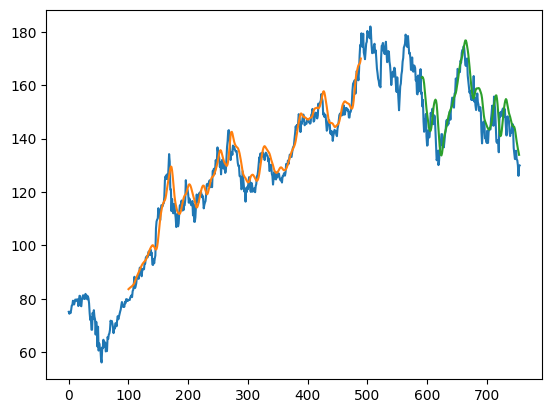

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

265

In [38]:
x_input=test_data[165:].reshape(1,-1)
x_input.shape


(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.8985844743823078,
 0.8926281932820003,
 0.921297764492048,
 0.9299541972744244,
 0.9286834948896218,
 0.9407549251835495,
 0.9375781692215427,
 0.9166915592327748,
 0.8853218363406582,
 0.88262156347774,
 0.8850041001540329,
 0.9048583704883914,
 0.8539519922676923,
 0.8361626436038504,
 0.8165466148190362,
 0.8031251086840739,
 0.8090020163281498,
 0.791927271132092,
 0.7817618944153683,
 0.793118600060663,
 0.7812060378600479,
 0.8043163164317958,
 0.852443048333345,
 0.7762820964141496,
 0.7879564170652203,
 0.7646077757630788,
 0.7513451377214292,
 0.7813647847725113,
 0.8005837039144684,
 0.775329130215972,
 0.7675462901755413,
 0.7492008425946807,
 0.7519011154575989,
 0.7597633289542612,
 0.7445152638791758,
 0.6860642871675903,
 0.6520737860496363,
 0.6858260456180459,
 0.7148133530147188,
 0.7171957685101625,
 0.7094923019259635,
 0.6670836095751774,
 0.6697043878010146,
 0.6582683086994882,
 0.6531856203411265,
 0.690114635871543,
 0.6535033565277518,
 0.6855084306122697,


In [41]:
import numpy as np

# Assuming these are the parameters for denormalization (replace with actual values)
min_value = 10  # Replace with the minimum value of your original dataset
max_value = 100  # Replace with the maximum value of your original dataset

lst_output = []  # List to store output values
n_steps = 100    # Number of steps for input window
i = 0
temp_input = [10] * 100  # Example starting values (replace with actual input data)

# Loop for 30 days of predictions
while i < 30:
    if len(temp_input) > 100:
        # Prepare the input for prediction
        x_input = np.array(temp_input[1:])  # Skip the first value
        print(f"Day {i} input: {x_input}")

        x_input = x_input.reshape((1, n_steps, 1))  # Reshaping to 3D
        yhat = model.predict(x_input, verbose=0)
        print(f"Day {i} output (normalized): {yhat}")

        # Denormalize the output and round to whole numbers
        denormalized_yhat = (yhat * (max_value - min_value)) + min_value
        denormalized_yhat = np.round(denormalized_yhat)  # Convert to whole numbers

        print(f"Day {i} output (denormalized): {denormalized_yhat}")

        # Add the denormalized output to temp_input and ensure the list has only n_steps elements
        temp_input.extend(denormalized_yhat[0].tolist())
        temp_input = temp_input[1:]  # Keep only the last n_steps elements
        
        lst_output.extend(denormalized_yhat.tolist())  # Add to final output list
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))  # Reshaping again
        yhat = model.predict(x_input, verbose=0)
        print(f"Output (normalized): {yhat[0]}")

        # Denormalize the output and round to whole numbers
        denormalized_yhat = (yhat * (max_value - min_value)) + min_value
        denormalized_yhat = np.round(denormalized_yhat)  # Convert to whole numbers

        print(f"Output (denormalized): {denormalized_yhat[0]}")

        # Extend temp_input with the denormalized value
        temp_input.extend(denormalized_yhat[0].tolist())
        temp_input = temp_input[1:]  # Keep only the last n_steps elements

        lst_output.extend(denormalized_yhat.tolist())  # Add to final output list
        i += 1

print("Final output for next 30 days:", lst_output)


Output (normalized): [3.9756541]
Output (denormalized): [368.]
Output (normalized): [3.9280257]
Output (denormalized): [364.]
Output (normalized): [3.8891838]
Output (denormalized): [360.]
Output (normalized): [3.8501348]
Output (denormalized): [357.]
Output (normalized): [3.8120537]
Output (denormalized): [353.]
Output (normalized): [3.775594]
Output (denormalized): [350.]
Output (normalized): [3.7411518]
Output (denormalized): [347.]
Output (normalized): [3.7089531]
Output (denormalized): [344.]
Output (normalized): [3.6790974]
Output (denormalized): [341.]
Output (normalized): [3.6515932]
Output (denormalized): [339.]
Output (normalized): [3.6263885]
Output (denormalized): [336.]
Output (normalized): [3.6033924]
Output (denormalized): [334.]
Output (normalized): [3.5824866]
Output (denormalized): [332.]
Output (normalized): [3.5635421]
Output (denormalized): [331.]
Output (normalized): [3.546417]
Output (denormalized): [329.]
Output (normalized): [3.5309756]
Output (denormalized): [

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

756

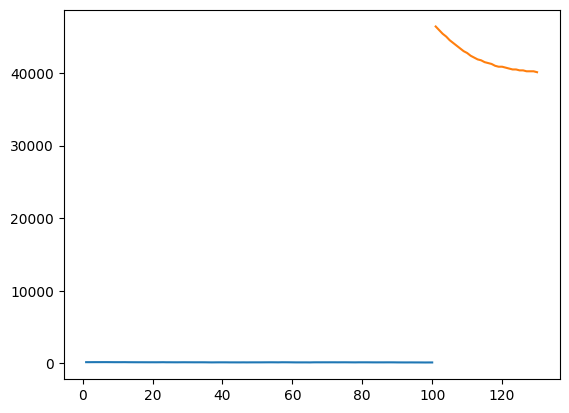

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[656:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

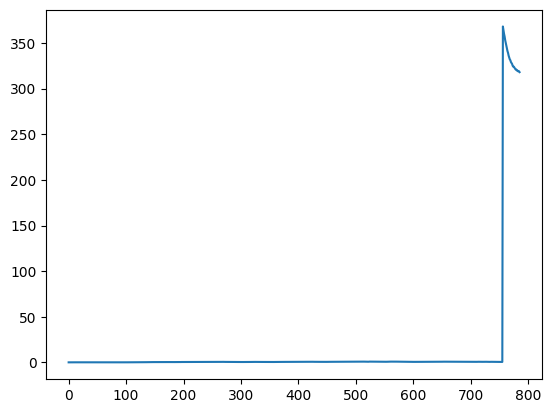

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[0:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()

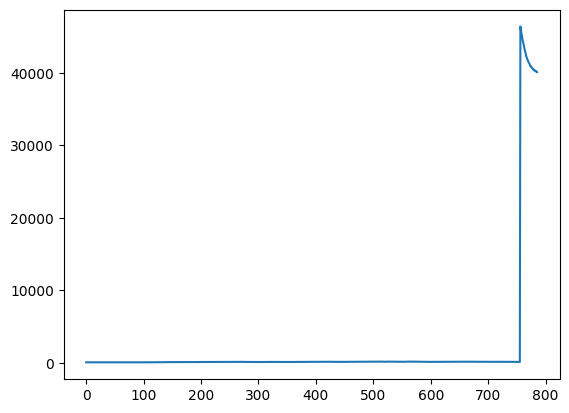

In [48]:
plt.plot(df3)

In [49]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[3.426816]
101
1 day input [ 10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.
  10.          10.          10.          10.         368.
 364.         360.         357.         353.         350.
 347.         344.         341.         339.         336.
 334.         332.         331.         329. 

In [50]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [51]:
import matplotlib.pyplot as plt

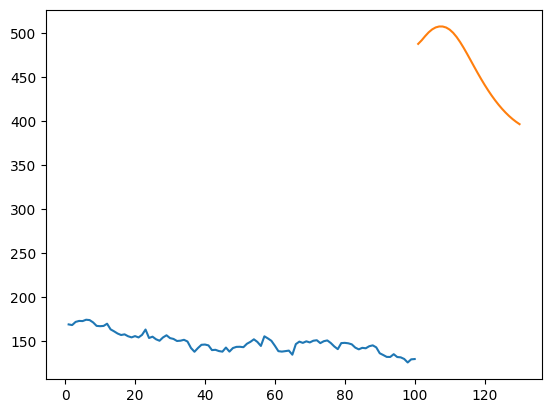

In [52]:
plt.plot(day_new,scaler.inverse_transform(df1[656:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))